**GOAL: Creating a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**


## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('/home/mr-pieterson/Desktop/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

Creating a bar plot that shows the total counts per target value.

<Axes: xlabel='target', ylabel='count'>

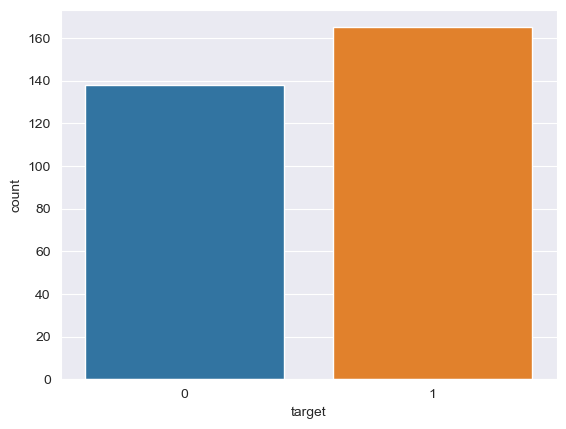

In [7]:
sns.countplot(x='target', data=df)

**Creating a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']

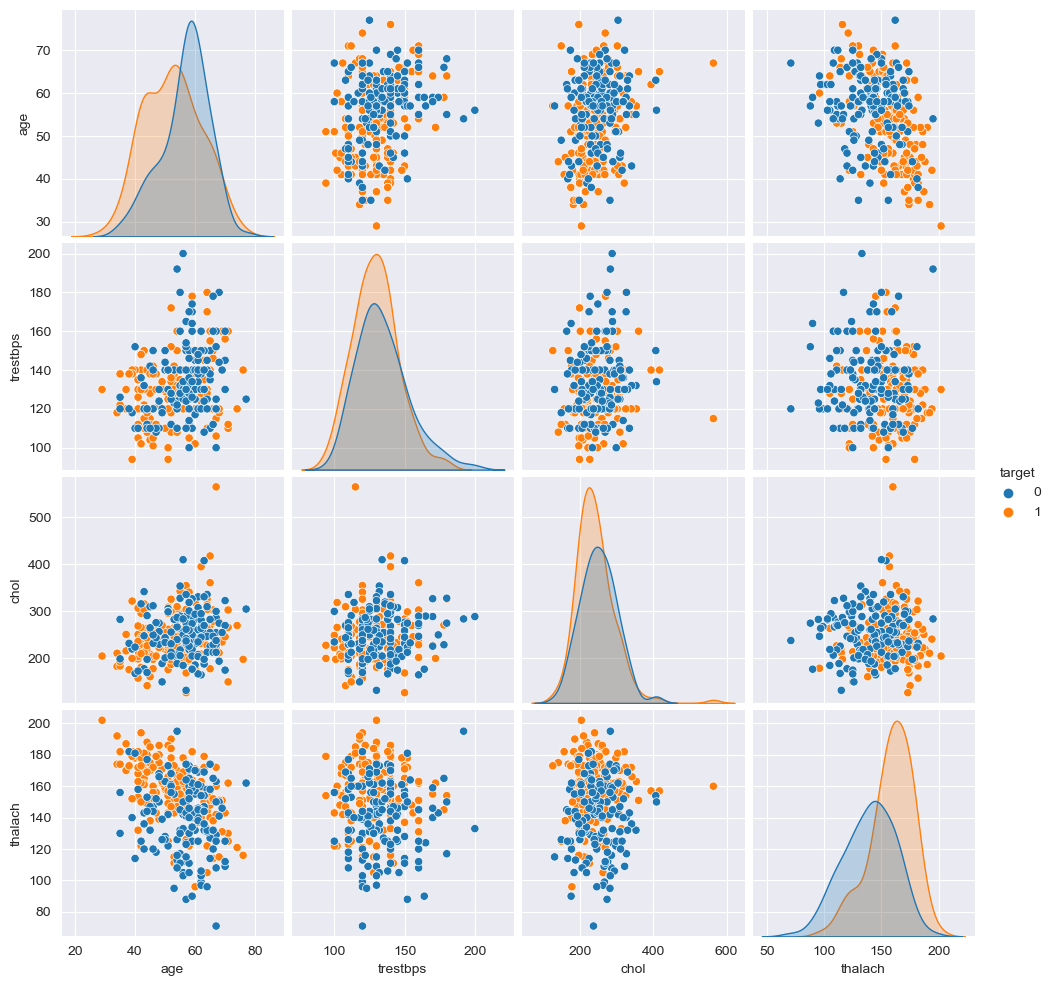

In [8]:
sns.pairplot(df, vars=['age','trestbps','chol', 'thalach'], hue='target');

**Creating a heatmap that displays the correlation between all the columns.**

<Axes: >

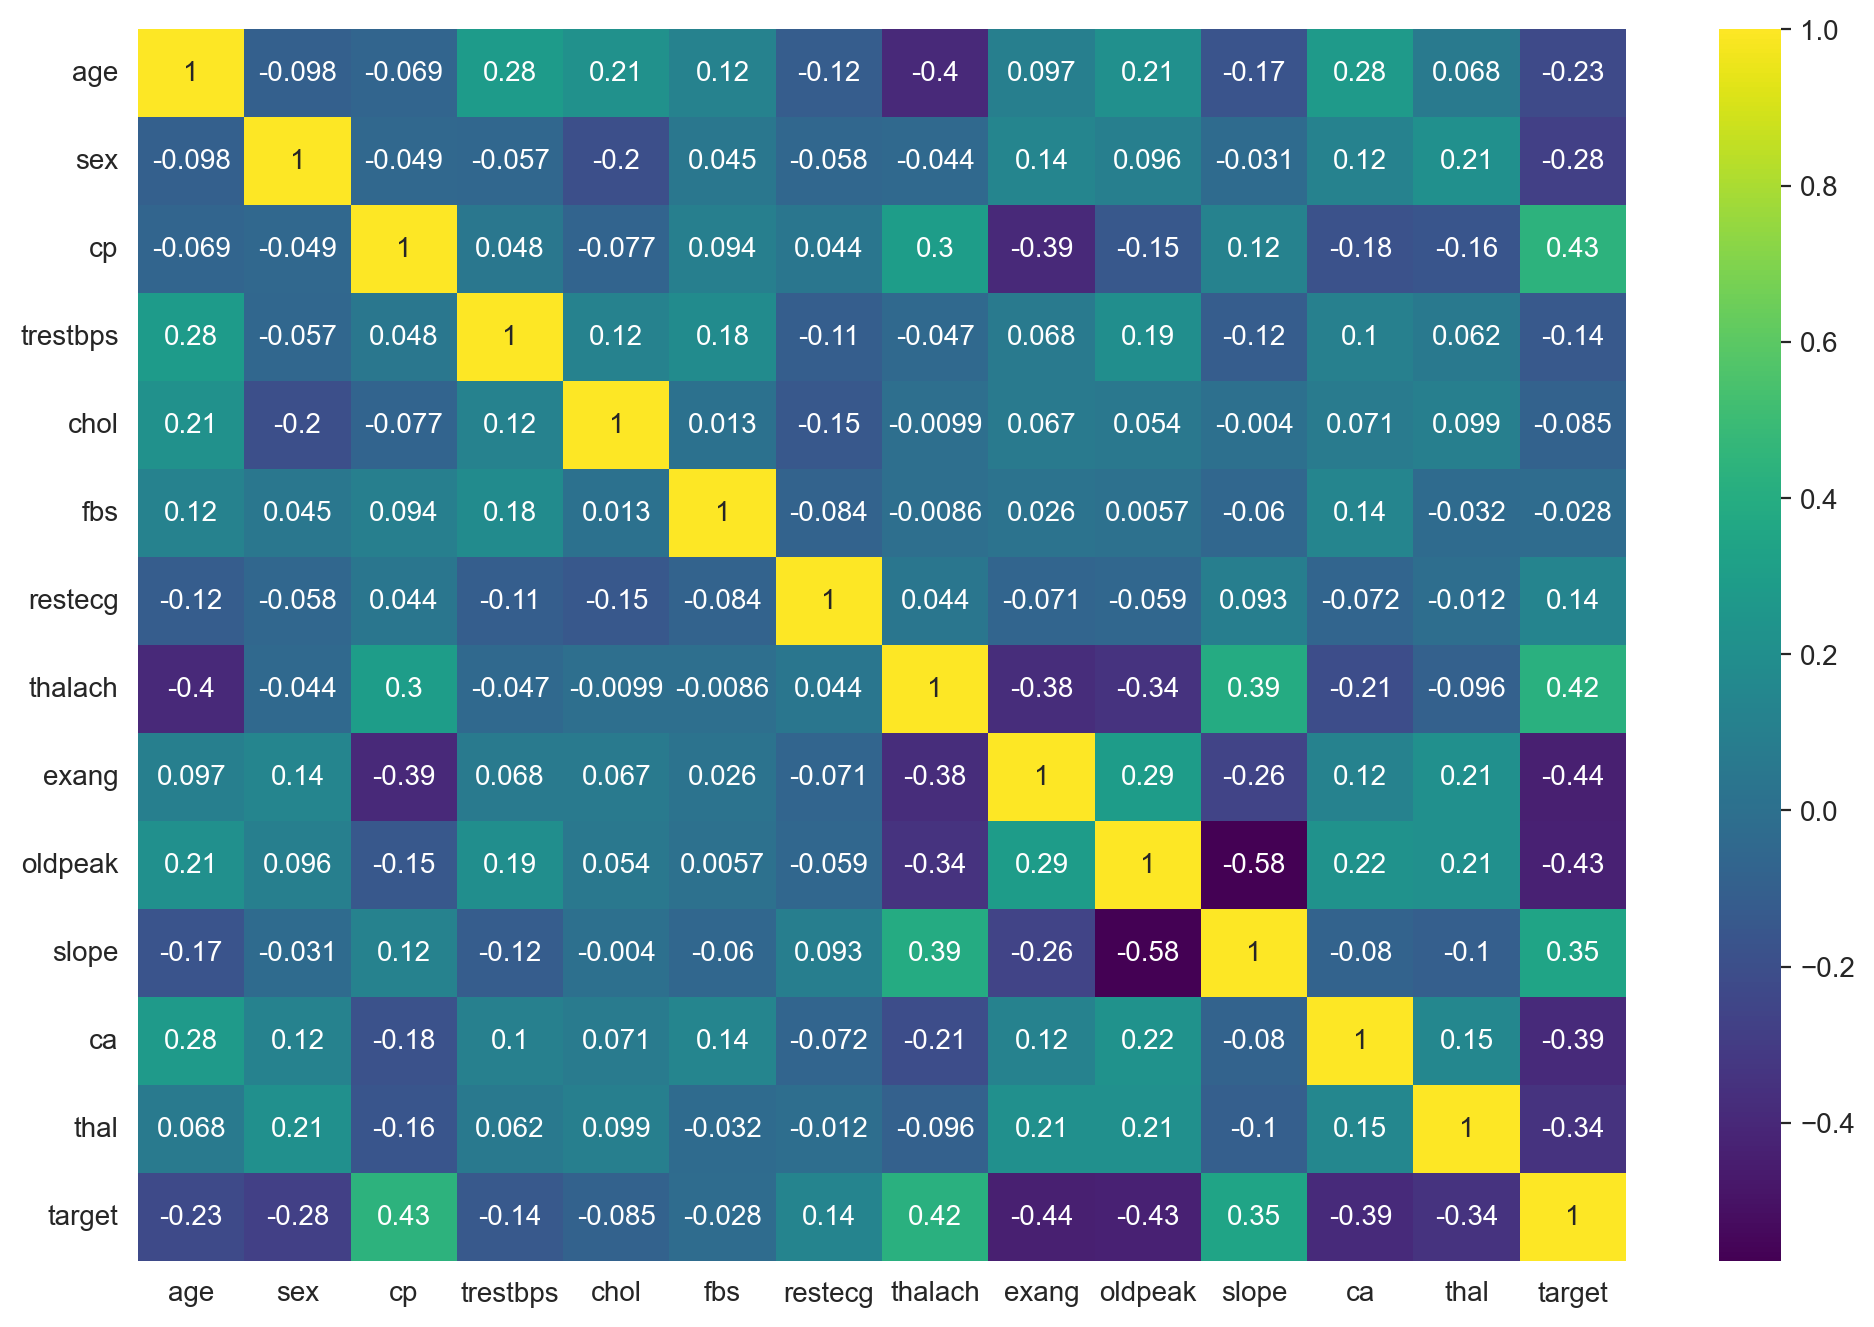

In [9]:
fig, ax = plt.subplots(figsize=(12, 8),dpi = 200)
sns.heatmap(df.corr(),annot=True,cmap='viridis')


# Machine Learning

## Train | Test Split and Scaling

**Separating the features from the labels into 2 objects, X and y.**

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split

**Performing a train test split on the data, with the test size of 10% and a random_state of 101.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [13]:
from sklearn.preprocessing import StandardScaler

**Creating a StandardScaler object and normalize the X train and test set feature data**

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

## Logistic Regression Model

**Creating a Logistic Regression model and using Cross-Validation to find a well-performing C value for the hyper-parameter search**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [18]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)

In [19]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,1,20)
param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C}

In [20]:
#help(LogisticRegressionCV)

In [21]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

**Reporting back the search's optimal parameters, specifically the C value.** 

In [22]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([ 1.        ,  1.12883789,  1.27427499,  1.43844989,  1.62377674,
        1.83298071,  2.06913808,  2.33572147,  2.6366509 ,  2.97635144,
        3.35981829,  3.79269019,  4.2813324 ,  4.83293024,  5.45559478,
        6.15848211,  6.95192796,  7.8475997 ,  8.8586679 , 10.        ]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

### Coeffecients

**Reporting back the model's coefficients.**

In [23]:
best_estimator = grid_model.best_estimator_

In [24]:
print(best_estimator.coef_)

[[-0.04786038 -0.69649168  0.88802672 -0.23905758 -0.18650221  0.00234569
   0.09603572  0.42194166 -0.40863424 -0.52446712  0.35776361 -0.83238232
  -0.56450059]]


**Creating a barplot of the codefficent values and sorting them**

In [25]:
coefs = pd.Series(index=X.columns, data=best_estimator.coef_[0])

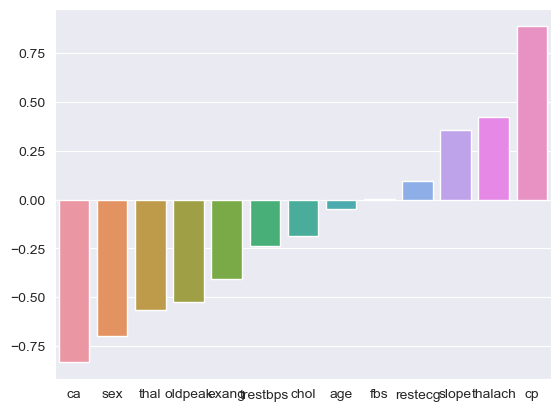

In [26]:
coefs = coefs.sort_values()
sns.barplot(x=coefs.index, y=coefs.values);


## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

In [27]:
y_pred = grid_model.predict(X_test)

In [28]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [30]:
accuracy = accuracy_score(y_test, y_pred)

In [31]:
accuracy

0.8387096774193549

In [32]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[12,  3],
       [ 2, 14]])

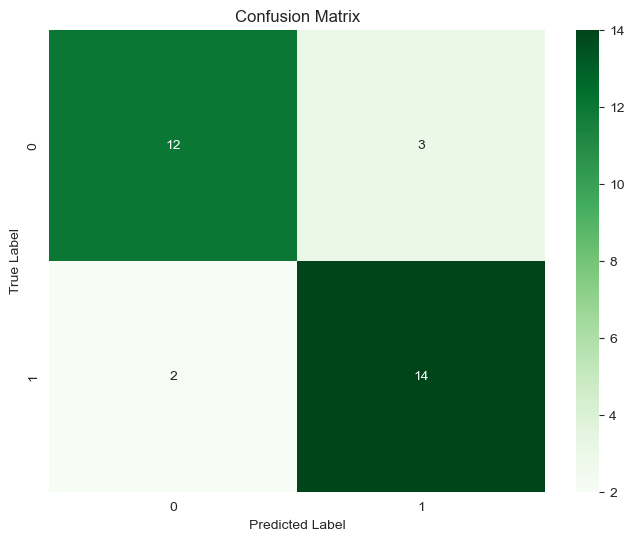

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31


**Created A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [35]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [36]:
patient_pred = grid_model.predict(patient)

In [37]:
patient_pred

array([0])

In [38]:
grid_model.predict_proba(patient)

array([[1.00000000e+00, 1.29538578e-18]])